In [1]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199769 sha256=19fd50f5a355712729baf5c2ce07cec8ac6d0427fb374b884a5e096aad01a8a9
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [2]:
!pip install nltk

In [3]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import re

In [5]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Classification/FastText/Datasets/fsa_prod_dump.csv', on_bad_lines='skip')
df.head()

,L0_Category,L1_Class,L2_Category,L3_Dictionary_SubCategory,L4_dictionarySubgroup,ProdName,ItemCode,Vendor,ProdType
0,NaN,NaN,NaN,NaN,NaN,GROUND CHUCK FLAP 50% CHUCK NECK 50%,623,Golden Gate Meat Company,Canonical
1,Food,Food - Meat & Game,Beef -- Ground & Shapes,Beef (Bulk) - Ground,Beef Ground >10% Fat (NAMP 136),FINE GRIND BEEF TUBES 81/19 6/10#,624,Golden Gate Meat Company,Canonical
2,Food,Food - Meat & Game,Beef - Foodservice Whole Cuts,Beef (Bulk) - Plate Cuts,Outside Skirt - Skinned (NAMP # 121E),AUST OUTSIDE SKIRT PEELED SOLD BY CASE,1717,Golden Gate Meat Company,Canonical
3,Food,Food - Meat & Game,Beef Deli & Charcuterie,Beef - Deli & Charcuterie,Beef Pastrami (NAMP # 611),PASTRAMI - NEW YORK STYLE- SABRA,1820,Golden Gate Meat Company,Canonical
4,Food,Food - Meat & Game,Beef Deli & Charcuterie,Beef - Deli & Charcuterie,Beef Pastrami (NAMP # 611),PASTRAMI SLICED 5# BAGS (50# CASE),1821,Golden Gate Meat Company,Canonical


In [6]:
# Separate dataset into 4 dataset based on L0_Category
# Preprocessing
# Droppig missing values
df = df.dropna(axis=0)

# Drop duplicates
df.drop_duplicates(keep='first', inplace=True)

In [7]:
df.L0_Category.unique()

array(['Food', 'Administrative', 'Operationals', 'Beverage'], dtype=object)

In [8]:
# Separate into 4 diffrent categories
df_food = df[df['L0_Category']=='Food']
df_administrative = df[df['L0_Category']=='Administrative']
df_operationals = df[df['L0_Category']=='Operationals']
df_beverage = df[df['L0_Category']=='Beverage']

In [9]:
print(df_food.L0_Category.unique())
print(df_administrative.L0_Category.unique())
print(df_operationals.L0_Category.unique())
print(df_beverage.L0_Category.unique())

['Food']
['Administrative']
['Operationals']
['Beverage']


In [10]:
# Save into four different csv
df_food.to_csv('/content/drive/MyDrive/Classification/FastText/Datasets/L4/food.csv', header=True, index=False)
df_administrative.to_csv('/content/drive/MyDrive/Classification/FastText/Datasets/L4/administrative.csv', header=True, index=False)
df_operationals.to_csv('/content/drive/MyDrive/Classification/FastText/Datasets/L4/operationals.csv', header=True, index=False)
df_beverage.to_csv('/content/drive/MyDrive/Classification/FastText/Datasets/L4/beverage.csv', header=True, index=False)

# **L4 Category**

In [11]:
# Preprocessing fuction for category
def class_pre(text):
  new_text = re.sub(r'&', 'and', text)
  new_text = re.sub(r'[^\w\s]',' ', new_text)
  new_text = re.sub(r' +', ' ', new_text)
  new_text = re.sub(r'\s', '_', new_text)
  return new_text

In [12]:
# Replace all white spaces whith single space
# Remove white spaces in begining and end of the text
# Turn text into lower case

# Preprocessing Function
def preprocess(text):
    text = re.sub(r'&', 'and', text)
    text = re.sub(r'[^\w\s]',' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip().lower()

In [13]:
# Cleaning function currently using
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# Did a slight modification, convert & into and
# Then removes extra whitespaces

def clean(string):
    string = re.sub('&', 'and ', string)
    raw_text = re.sub("[^a-zA-Z]+", " ", string)
    raw_text = re.sub(' +', ' ', raw_text)
    raw_text = raw_text.strip()
    words = raw_text.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [
        word for word in words if ((not word in stops) and (len(word) >= 3))
    ]
    string = " ".join(meaningful_words)
    return string

## Food

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Classification/FastText/Datasets/L4/food.csv')
df.head()

,L0_Category,L1_Class,L2_Category,L3_Dictionary_SubCategory,L4_dictionarySubgroup,ProdName,ItemCode,Vendor,ProdType
0,Food,Food - Meat & Game,Beef -- Ground & Shapes,Beef (Bulk) - Ground,Beef Ground >10% Fat (NAMP 136),FINE GRIND BEEF TUBES 81/19 6/10#,624,Golden Gate Meat Company,Canonical
1,Food,Food - Meat & Game,Beef - Foodservice Whole Cuts,Beef (Bulk) - Plate Cuts,Outside Skirt - Skinned (NAMP # 121E),AUST OUTSIDE SKIRT PEELED SOLD BY CASE,1717,Golden Gate Meat Company,Canonical
2,Food,Food - Meat & Game,Beef Deli & Charcuterie,Beef - Deli & Charcuterie,Beef Pastrami (NAMP # 611),PASTRAMI - NEW YORK STYLE- SABRA,1820,Golden Gate Meat Company,Canonical
3,Food,Food - Meat & Game,Beef Deli & Charcuterie,Beef - Deli & Charcuterie,Beef Pastrami (NAMP # 611),PASTRAMI SLICED 5# BAGS (50# CASE),1821,Golden Gate Meat Company,Canonical
4,Food,Food - Meat & Game,Beef Deli & Charcuterie,Beef - Deli & Charcuterie,Beef Round - Eye of Round - Fully Cooked (NAMP...,ROAST BEEF EYE OF ROUND,1825,Golden Gate Meat Company,Canonical


In [16]:
# Counting L4 Category classes
len(df.L4_dictionarySubgroup.unique())

6140

In [17]:
value_counts = df.L4_dictionarySubgroup.value_counts()
filtered_counts = value_counts[value_counts < 15]
print(filtered_counts)

Taco Meat (Ground Beef)            14
Antelope - Ground                  14
Pumpkin Filling                    14
Garlic - Fried                     14
Seasoning - Bourbon                14
                                   ..
Caprese                             1
Piping Gel                          1
Cherries - Skeena - Fresh Whole     1
Benne Seed                          1
Carrot - Belgian - Fresh            1
Name: L4_dictionarySubgroup, Length: 2538, dtype: int64


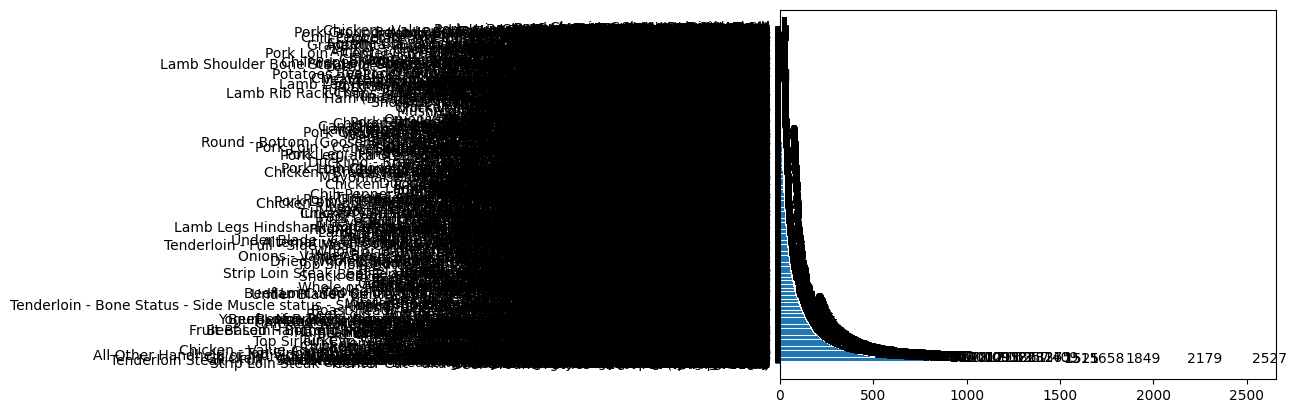

In [18]:
# Check value counts in a plot
# Import libraries
import matplotlib.pyplot as plt

# Get the values count
counts = df.L4_dictionarySubgroup.value_counts()


# Change the figure size
# fig = plt.figure(figsize=(10, 15))

for index, value in enumerate(counts.values):
    plt.text(value + 1, index, str(value))

plt.barh(counts.index, counts.values)
plt.show()

In [19]:
# Checking the number of data points
df.shape

(403150, 9)

In [20]:
# making the category
df['L4'] = df['L4_dictionarySubgroup'].apply(class_pre)

In [21]:
# Making the category using labels into format
df['category'] = '__label__' + df['L4'].astype(str)

In [22]:
# Dropping irrelavant columns
columns = ['L0_Category', 'L4_dictionarySubgroup', 'ItemCode', 'Vendor', 'ProdType', 'L4']

# Dropping
df = df.drop(columns, axis=1)

In [23]:
df.head()

,L1_Class,L2_Category,L3_Dictionary_SubCategory,ProdName,category
0,Food - Meat & Game,Beef -- Ground & Shapes,Beef (Bulk) - Ground,FINE GRIND BEEF TUBES 81/19 6/10#,__label__Beef_Ground_10_Fat_NAMP_136_
1,Food - Meat & Game,Beef - Foodservice Whole Cuts,Beef (Bulk) - Plate Cuts,AUST OUTSIDE SKIRT PEELED SOLD BY CASE,__label__Outside_Skirt_Skinned_NAMP_121E_
2,Food - Meat & Game,Beef Deli & Charcuterie,Beef - Deli & Charcuterie,PASTRAMI - NEW YORK STYLE- SABRA,__label__Beef_Pastrami_NAMP_611_
3,Food - Meat & Game,Beef Deli & Charcuterie,Beef - Deli & Charcuterie,PASTRAMI SLICED 5# BAGS (50# CASE),__label__Beef_Pastrami_NAMP_611_
4,Food - Meat & Game,Beef Deli & Charcuterie,Beef - Deli & Charcuterie,ROAST BEEF EYE OF ROUND,__label__Beef_Round_Eye_of_Round_Fully_Cooked_...


In [24]:
# Creating catehory description with producbt name and vendor
# df['category_description'] = df['category'] + ' ' + df['L1_Class'] + ' ' + df['L2_Category'] + ' ' + df['L3_Dictionary_SubCategory'] + ' ' + df['ProdName']
df['category_description'] = df['category'] + ' ' + df['L3_Dictionary_SubCategory'] + ' ' + df['ProdName']

In [25]:
# Drop used columns
columns = ['L1_Class', 'L2_Category', 'L3_Dictionary_SubCategory', 'ProdName']

df = df.drop(columns, axis=1)

In [26]:
# Apply preprocessing function to 'category_description'

df['category_description'] = df['category_description'].apply(preprocess)

In [27]:
# Test Train splitting
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.05, random_state=42)

In [28]:
# Save test and train dataset into two differnet files
train.to_csv('/content/drive/MyDrive/Classification/FastText/Datasets/L4/food_train.train',
             columns=["category_description"],
             index=False,
             header=False)

test.to_csv('/content/drive/MyDrive/Classification/FastText/Datasets/L4/food_test.train',
             columns=["category_description"],
             index=False,
             header=False)

In [29]:
# Fast text model
import fasttext

model = fasttext.train_supervised(input='/content/drive/MyDrive/Classification/FastText/Datasets/L4/food_train.train',
                                  dim=300,
                                  loss='hs',
                                  wordNgrams=4,
                                  lr=0.5,
                                  epoch=20,
                                  minn=3,
                                  maxn=5)

model.test('/content/drive/MyDrive/Classification/FastText/Datasets/L4/food_test.train')

(20147, 0.8601280587680548, 0.8601280587680548)

In [44]:
text = 'Finfish Whole --- Salmon -- All Forms	Ewig Smoked Salmon Whole H/On'
text = preprocess(text)
model.predict(text, k=5)
# Correct class - Salmon - Smoked Whole

(('__label__salmon_smoked_whole',
  '__label__salmon_ground_patty_steaks_and_pieces',
  '__label__whiting_whole',
  '__label__salmon_smoked_fillets',
  '__label__salmon_king_chinook_whole'),
 array([0.9761008 , 0.0061672 , 0.00427248, 0.0032652 , 0.00236294]))

In [31]:
# model.save_model('/content/drive/MyDrive/Classification/FastText/L4/Administrative/tuned_model.bin')

Selecting datapoints with for prediction

In [32]:
sample = pd.read_csv('/content/drive/MyDrive/Classification/FastText/Datasets/L4/food.csv')
sample.head()

,L0_Category,L1_Class,L2_Category,L3_Dictionary_SubCategory,L4_dictionarySubgroup,ProdName,ItemCode,Vendor,ProdType
0,Food,Food - Meat & Game,Beef -- Ground & Shapes,Beef (Bulk) - Ground,Beef Ground >10% Fat (NAMP 136),FINE GRIND BEEF TUBES 81/19 6/10#,624,Golden Gate Meat Company,Canonical
1,Food,Food - Meat & Game,Beef - Foodservice Whole Cuts,Beef (Bulk) - Plate Cuts,Outside Skirt - Skinned (NAMP # 121E),AUST OUTSIDE SKIRT PEELED SOLD BY CASE,1717,Golden Gate Meat Company,Canonical
2,Food,Food - Meat & Game,Beef Deli & Charcuterie,Beef - Deli & Charcuterie,Beef Pastrami (NAMP # 611),PASTRAMI - NEW YORK STYLE- SABRA,1820,Golden Gate Meat Company,Canonical
3,Food,Food - Meat & Game,Beef Deli & Charcuterie,Beef - Deli & Charcuterie,Beef Pastrami (NAMP # 611),PASTRAMI SLICED 5# BAGS (50# CASE),1821,Golden Gate Meat Company,Canonical
4,Food,Food - Meat & Game,Beef Deli & Charcuterie,Beef - Deli & Charcuterie,Beef Round - Eye of Round - Fully Cooked (NAMP...,ROAST BEEF EYE OF ROUND,1825,Golden Gate Meat Company,Canonical


In [33]:
drop_columns = ['L0_Category', 'L1_Class', 'L2_Category', 'ItemCode', 'Vendor', 'ProdType']
sample = sample.drop(drop_columns, axis=1)

In [34]:
sample.head(10)

,L3_Dictionary_SubCategory,L4_dictionarySubgroup,ProdName
0,Beef (Bulk) - Ground,Beef Ground >10% Fat (NAMP 136),FINE GRIND BEEF TUBES 81/19 6/10#
1,Beef (Bulk) - Plate Cuts,Outside Skirt - Skinned (NAMP # 121E),AUST OUTSIDE SKIRT PEELED SOLD BY CASE
2,Beef - Deli & Charcuterie,Beef Pastrami (NAMP # 611),PASTRAMI - NEW YORK STYLE- SABRA
3,Beef - Deli & Charcuterie,Beef Pastrami (NAMP # 611),PASTRAMI SLICED 5# BAGS (50# CASE)
4,Beef - Deli & Charcuterie,Beef Round - Eye of Round - Fully Cooked (NAMP...,ROAST BEEF EYE OF ROUND
5,Beef - Deli & Charcuterie,Beef Pastrami (NAMP # 611),WISE SONS SMOKED PASTRAMI BRISKET
6,Beef (Bulk) - Sirloin Cuts,Beef Loin - Bottom Sirloin Butt - Flap - Bonel...,CHUCK FLAP TAIL NATURAL ANGUS
7,Savory Sauces - Glace,Glace de Veau,GLACE de VEAU (1# )
8,Savory Sauces - Glace,Glace de Viandi,DEMI GLACE DE VIANDE VE/BF 16#
9,Savory Sauces - Glace,Glace de Poulet,GLACE de POULET 5# TUB


In [35]:
uniques = sample.L4_dictionarySubgroup.unique()
for unique in uniques:
  print(unique)

Beef Ground >10% Fat (NAMP 136)
Outside Skirt - Skinned (NAMP # 121E)
Beef Pastrami (NAMP # 611)
Beef Round - Eye of Round - Fully Cooked (NAMP # 624A)
Beef Loin - Bottom Sirloin Butt - Flap - Boneless AKA Bavette (IM) (NAMP # 185A)
Glace de Veau
Glace de Viandi
Glace de Poulet
Pork Loin - Center-Cut - 11 Ribs - Chine Bone Off - Bone-In (NAMP # 412D)
Cheese and Meat Snack with or without Crackers
Sausage - Flavored
Pork Shoulder Rib Ends (NAMP # 403D)
Pork Intestines (NAMP #4744)
Lamb Legs Hindshank (NAMP # 233)
Lamb Tenderloin (NAMP # 246)
Lamb Rack Roast (NAMP # 204)
Lamb Leg Top Sirloin Boneless (NAMP # 234G)
Lamb Rack Frenched Style Cap Status Unknown (NAMP # 204x)
Bacon Uncooked Sliced (NAMP # 539)
Turkey Bacon - Sliced
Dry Salami (NAMP # 808)
Italian Sausage (NAMP # 818)
Pork Sausage - Chorizo
Pork Sausage Uncooked Bulk or Link (NAMP # 802)
Jowls (NAMP # 419)
Pepperoni (NAMP # 821)
Chicken Sausage - Apple
Blue (Bleu)
Turkey - Ground - Bulk
Duck - Breast - Half aka Single Lobe
Duc

In [42]:
sample_test = sample[sample['L4_dictionarySubgroup']=='Salmon - Smoked Whole']
sample_test.head()

,L3_Dictionary_SubCategory,L4_dictionarySubgroup,ProdName
272772,Finfish Whole --- Salmon -- All Forms,Salmon - Smoked Whole,Ewig Smoked Salmon Whole H/On
272781,Finfish Whole --- Salmon -- All Forms,Salmon - Smoked Whole,Frz. Ewig Smoked Salmon Whole
272816,Finfish Whole --- Salmon -- All Forms,Salmon - Smoked Whole,Wfm Sal Hot Smkd Sckeye 12/4Oz Whole Foods Mar...
272817,Finfish Whole --- Salmon -- All Forms,Salmon - Smoked Whole,Wfm Sal Smk Sckye Pep 12/4Oz Whole Foods Marke...
274954,Finfish Whole --- Salmon -- All Forms,Salmon - Smoked Whole,Ewig Smoked Salmon Whole H/On


### **Lable preprocessing Function**

In [37]:
prediction = model.predict(text)
print(prediction[0][0])

__label__mixed_beef_and_bison_buffalo_items


In [38]:
# This function process the prediction by getting the input
def get_lable(text):
  # Processing the text
  text = preprocess(text)
  # Get the prediction
  prediction = model.predict(text)
  return prediction[0][0]

In [39]:
from_func = get_lable(text)
print(from_func)

__label__mixed_beef_and_bison_buffalo_items


In [40]:
# Function to preprocess the lable
def label_processing(label):
  label = re.sub('__label__', '', label)
  label = re.sub('_', ' ', label)
  label = re.sub(' +', ' ', label)
  return label.strip().lower()

In [41]:
print(label_processing(from_func))

mixed beef and bison buffalo items
